# Depression Classification Model using Ensemble learning

Installing necessary libraries

In [1]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
pip install lime

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [4]:
 !pip install shap==0.44.0
 !pip install shapash==2.4.1

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [5]:
!pip install optuna

^C


In [6]:
pip install hyperopt

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import the packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from hyperopt import fmin,hp,STATUS_OK,Trials,tpe
from sklearn.model_selection import cross_val_score
import numpy as np
import optuna
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer
import shapash
from sklearn.model_selection import learning_curve 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Reading data set and performing preprocessing steps

In [2]:
data=pd.read_csv("C:\\excels\\Student Depression Dataset.csv")


In [3]:
data.info
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [4]:
data['Financial Stress']=data['Financial Stress'].fillna(method='bfill')

In [5]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [7]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139887,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437379,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [8]:
data['Age']=data['Age'].round()

In [9]:
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [10]:
data=data.drop('Sleep Duration',axis=1)
data=data.drop('City',axis=1)
data=data.drop('id',axis=1)

In [11]:
data


,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Student,5.0,0.0,8.97,2.0,0.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Student,2.0,0.0,5.90,5.0,0.0,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Student,3.0,0.0,7.03,5.0,0.0,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Student,3.0,0.0,5.59,2.0,0.0,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Student,4.0,0.0,8.13,3.0,0.0,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Student,5.0,0.0,5.75,5.0,0.0,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,Male,27.0,Student,2.0,0.0,9.40,3.0,0.0,Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Student,3.0,0.0,6.61,4.0,0.0,Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Student,5.0,0.0,6.88,2.0,0.0,Healthy,Class 12,Yes,10.0,5.0,No,1


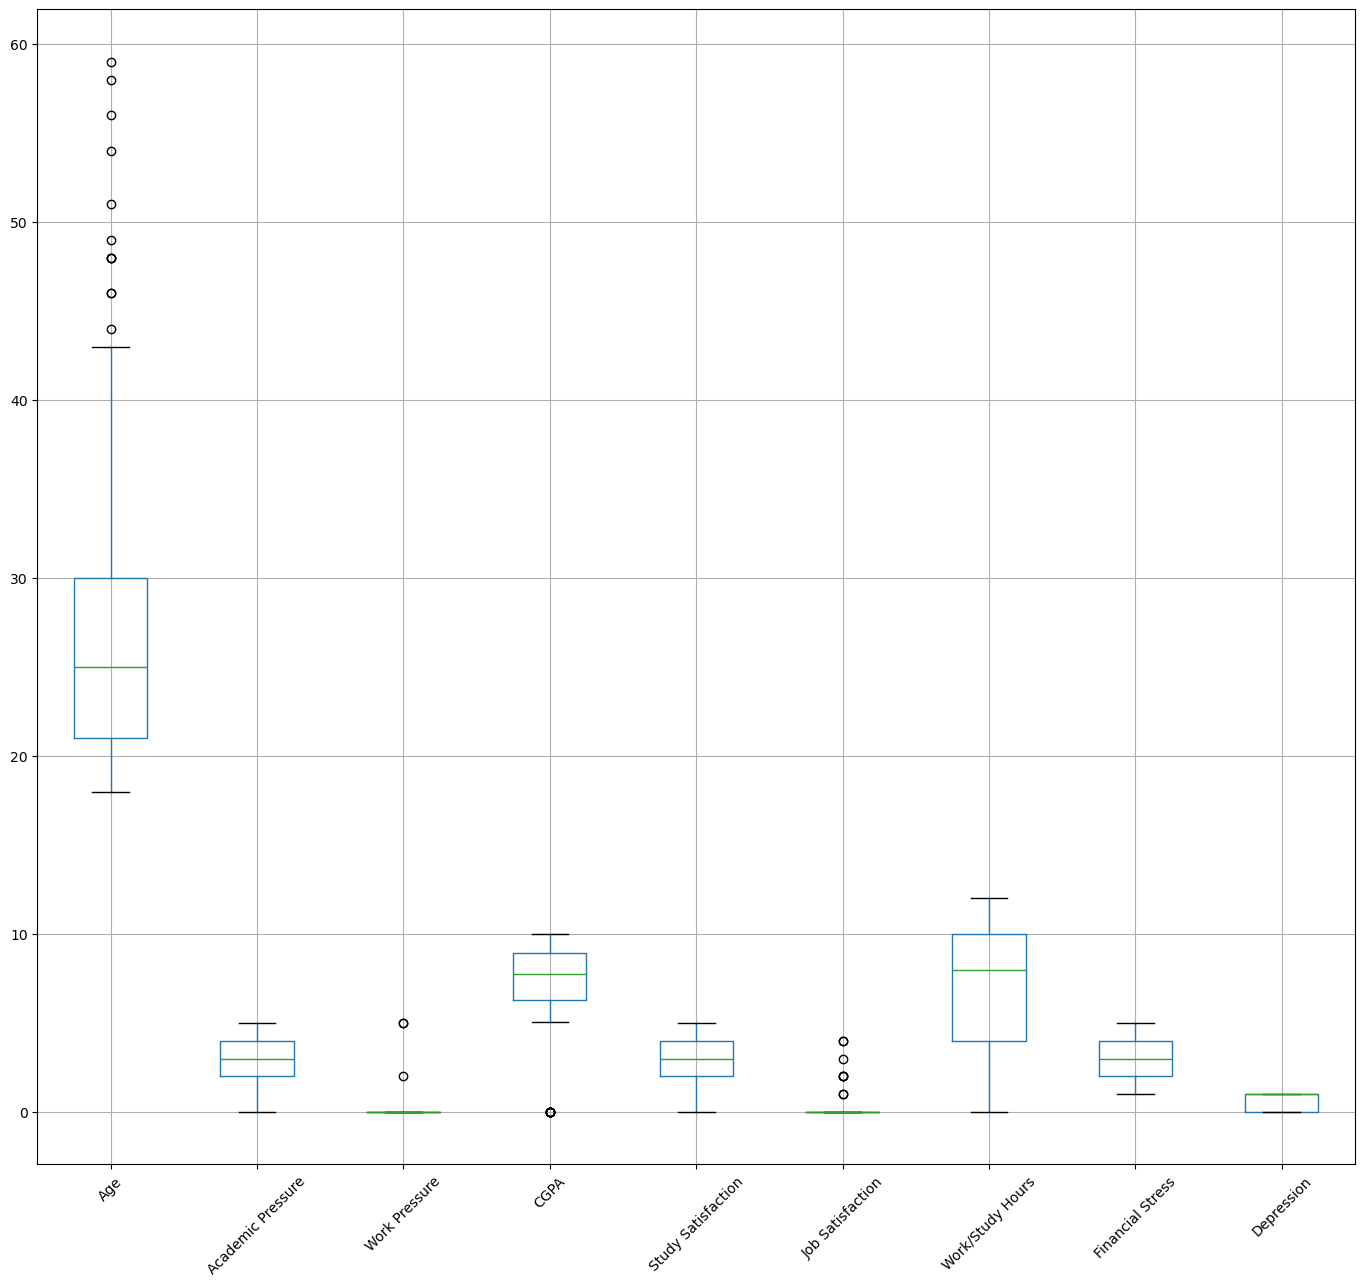

In [12]:
data.boxplot(figsize=(17,15))
plt.xticks(rotation=45)
plt.show()

In [13]:
q1, q3 = np.percentile(data['Age'], [25, 75])
iqr = q3 - q1
lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)
data['Age'] = np.where((data['Age'] < lb) | (data['Age'] > ub), data['Age'].median(), data['Age'])

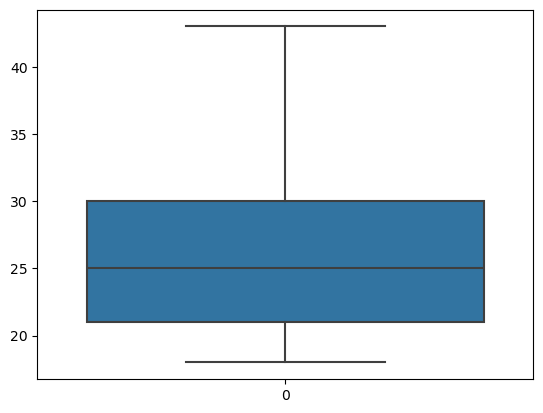

In [14]:
sns.boxplot(data['Age'])
plt.show()

q1,q3=np.percentile(data['Work Pressure'],[25,75])
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
data['Work Pressure']=np.where((data['Work Pressure']<lb )| (data['Work Pressure']>ub),data['Work Pressure'].median(),data['Work Pressure'])

sns.boxplot(data['Work Pressure'])
plt.show()

In [15]:
q1, q3 = np.percentile(data['Job Satisfaction'], [25, 75])
iqr = q3 - q1
lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)
data['Job Satisfaction'] = np.where((data['Job Satisfaction'] < lb) | (data['Job Satisfaction'] > ub), data['Job Satisfaction'].median(), data['Job Satisfaction'])

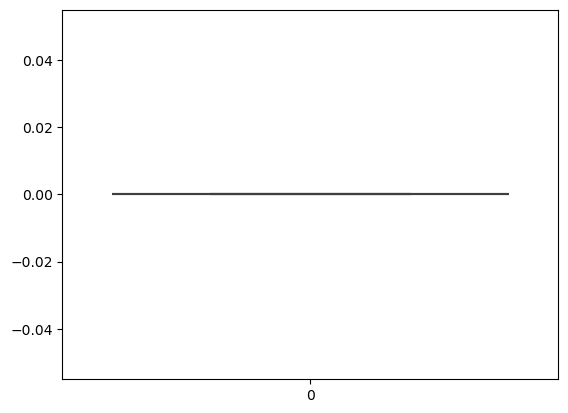

In [16]:
sns.boxplot(data['Job Satisfaction'])
plt.show()

In [17]:
encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])
data['Have you ever had suicidal thoughts ?']=encoder.fit_transform(data['Have you ever had suicidal thoughts ?'])
data['Family History of Mental Illness']=encoder.fit_transform(data['Family History of Mental Illness'])

In [18]:
data

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,Student,5.0,0.0,8.97,2.0,0.0,Healthy,B.Pharm,1,3.0,1.0,0,1
1,0,24.0,Student,2.0,0.0,5.90,5.0,0.0,Moderate,BSc,0,3.0,2.0,1,0
2,1,31.0,Student,3.0,0.0,7.03,5.0,0.0,Healthy,BA,0,9.0,1.0,1,0
3,0,28.0,Student,3.0,0.0,5.59,2.0,0.0,Moderate,BCA,1,4.0,5.0,1,1
4,0,25.0,Student,4.0,0.0,8.13,3.0,0.0,Moderate,M.Tech,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,Student,5.0,0.0,5.75,5.0,0.0,Unhealthy,Class 12,1,7.0,1.0,1,0
27897,1,27.0,Student,2.0,0.0,9.40,3.0,0.0,Healthy,MSc,0,0.0,3.0,1,0
27898,1,31.0,Student,3.0,0.0,6.61,4.0,0.0,Unhealthy,MD,0,12.0,2.0,0,0
27899,0,18.0,Student,5.0,0.0,6.88,2.0,0.0,Healthy,Class 12,1,10.0,5.0,0,1


In [19]:
data['Have you ever had suicidal thoughts ?']

0        1
1        0
2        0
3        1
4        1
        ..
27896    1
27897    0
27898    0
27899    1
27900    1
Name: Have you ever had suicidal thoughts ?, Length: 27901, dtype: int32

In [20]:
data['Gender']

0        1
1        0
2        1
3        0
4        0
        ..
27896    0
27897    1
27898    1
27899    0
27900    1
Name: Gender, Length: 27901, dtype: int32

In [21]:
data=pd.get_dummies(data,columns=['Dietary Habits','Degree'])

In [22]:
num_col=['Age','CGPA','Work/Study Hours','Financial Stress']
scaler=StandardScaler()
data[num_col]=scaler.fit_transform(data[num_col])

In [23]:
data['Depression']

0        1
1        0
2        0
3        1
4        0
        ..
27896    0
27897    0
27898    0
27899    1
27900    1
Name: Depression, Length: 27901, dtype: int64

In [24]:
data

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,1,1.473803,Student,5.0,0.0,0.893393,2.0,0.0,1,-1.121213,...,False,False,False,False,False,False,False,False,False,False
1,0,-0.371346,Student,2.0,0.0,-1.194076,5.0,0.0,0,-1.121213,...,False,False,False,False,False,False,False,False,False,False
2,1,1.063770,Student,3.0,0.0,-0.425724,5.0,0.0,0,0.497095,...,False,False,False,False,False,False,False,False,False,False
3,0,0.448720,Student,3.0,0.0,-1.404862,2.0,0.0,1,-0.851495,...,False,False,False,False,False,False,False,False,False,False
4,0,-0.166329,Student,4.0,0.0,0.322229,3.0,0.0,1,-1.660650,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,0.243704,Student,5.0,0.0,-1.296069,5.0,0.0,1,-0.042341,...,False,False,False,False,False,False,False,False,False,False
27897,1,0.243704,Student,2.0,0.0,1.185774,3.0,0.0,0,-1.930368,...,False,False,False,False,False,False,False,True,False,False
27898,1,1.063770,Student,3.0,0.0,-0.711306,4.0,0.0,0,1.306249,...,False,False,False,False,True,False,False,False,False,False
27899,0,-1.601445,Student,5.0,0.0,-0.527718,2.0,0.0,1,0.766813,...,False,False,False,False,False,False,False,False,False,False


In [25]:
data['Depression']=data['Depression'].astype(int)

In [26]:
data['Profession']=encoder.fit_transform(data['Profession'])


In [27]:
data

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,1,1.473803,11,5.0,0.0,0.893393,2.0,0.0,1,-1.121213,...,False,False,False,False,False,False,False,False,False,False
1,0,-0.371346,11,2.0,0.0,-1.194076,5.0,0.0,0,-1.121213,...,False,False,False,False,False,False,False,False,False,False
2,1,1.063770,11,3.0,0.0,-0.425724,5.0,0.0,0,0.497095,...,False,False,False,False,False,False,False,False,False,False
3,0,0.448720,11,3.0,0.0,-1.404862,2.0,0.0,1,-0.851495,...,False,False,False,False,False,False,False,False,False,False
4,0,-0.166329,11,4.0,0.0,0.322229,3.0,0.0,1,-1.660650,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,0.243704,11,5.0,0.0,-1.296069,5.0,0.0,1,-0.042341,...,False,False,False,False,False,False,False,False,False,False
27897,1,0.243704,11,2.0,0.0,1.185774,3.0,0.0,0,-1.930368,...,False,False,False,False,False,False,False,True,False,False
27898,1,1.063770,11,3.0,0.0,-0.711306,4.0,0.0,0,1.306249,...,False,False,False,False,True,False,False,False,False,False
27899,0,-1.601445,11,5.0,0.0,-0.527718,2.0,0.0,1,0.766813,...,False,False,False,False,False,False,False,False,False,False


In [28]:
x=data.drop('Depression',axis=1)
y=data['Depression']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,train_size=.2)

# model training and testing

LogisticRegression

In [30]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lrp=lr.predict(x_test)
print("accuracy score",accuracy_score(y_test,lrp))
print("accuracy score",confusion_matrix(y_test,lrp))
print("accuracy score",classification_report(y_test,lrp))

accuracy score 0.8457506384122575
accuracy score [[ 7294  1896]
 [ 1547 11584]]
accuracy score               precision    recall  f1-score   support

           0       0.83      0.79      0.81      9190
           1       0.86      0.88      0.87     13131

    accuracy                           0.85     22321
   macro avg       0.84      0.84      0.84     22321
weighted avg       0.85      0.85      0.85     22321



Naive Bayes

In [31]:
g=GaussianNB()
b=BernoulliNB()
g.fit(x_train,y_train)
b.fit(x_train,y_train)
gp=g.predict(x_test)
bp=b.predict(x_test)
print("accuracy score Gaussian",accuracy_score(y_test,gp))
print("accuracy score Gaussian",confusion_matrix(y_test,gp))
print("accuracy score Gaussian",classification_report(y_test,gp))

accuracy score Gaussian 0.4127951256664128
accuracy score Gaussian [[ 9173    17]
 [13090    41]]
accuracy score Gaussian               precision    recall  f1-score   support

           0       0.41      1.00      0.58      9190
           1       0.71      0.00      0.01     13131

    accuracy                           0.41     22321
   macro avg       0.56      0.50      0.29     22321
weighted avg       0.59      0.41      0.24     22321



In [32]:
print("accuracy score bernouli",accuracy_score(y_test,bp))
print("accuracy score bernouli",confusion_matrix(y_test,bp))
print("accuracy score bernouli",classification_report(y_test,bp))

accuracy score bernouli 0.7902423726535549
accuracy score bernouli [[ 6733  2457]
 [ 2225 10906]]
accuracy score bernouli               precision    recall  f1-score   support

           0       0.75      0.73      0.74      9190
           1       0.82      0.83      0.82     13131

    accuracy                           0.79     22321
   macro avg       0.78      0.78      0.78     22321
weighted avg       0.79      0.79      0.79     22321



KNN

In [33]:
k=KNeighborsClassifier()
k.fit(x_train,y_train)
kp=k.predict(x_test)
print("accuracy score",accuracy_score(y_test,kp))
print("accuracy score",confusion_matrix(y_test,kp))
print("accuracy score",classification_report(y_test,kp))

accuracy score 0.8074011021011603
accuracy score [[ 6647  2543]
 [ 1756 11375]]
accuracy score               precision    recall  f1-score   support

           0       0.79      0.72      0.76      9190
           1       0.82      0.87      0.84     13131

    accuracy                           0.81     22321
   macro avg       0.80      0.79      0.80     22321
weighted avg       0.81      0.81      0.81     22321



DecisionTreeClassifier

In [34]:
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
dp=d.predict(x_test)
print("accuracy score",accuracy_score(y_test,dp))
print("accuracy score",confusion_matrix(y_test,dp))
print("accuracy score",classification_report(y_test,dp))

accuracy score 0.7691411675104162
accuracy score [[ 6672  2518]
 [ 2635 10496]]
accuracy score               precision    recall  f1-score   support

           0       0.72      0.73      0.72      9190
           1       0.81      0.80      0.80     13131

    accuracy                           0.77     22321
   macro avg       0.76      0.76      0.76     22321
weighted avg       0.77      0.77      0.77     22321



RandomForestClassifier

In [35]:
r=RandomForestClassifier()
r.fit(x_train,y_train)
rp=r.predict(x_test)
print("accuracy score",accuracy_score(y_test,rp))
print("accuracy score",confusion_matrix(y_test,rp))
print("accuracy score",classification_report(y_test,rp))

accuracy score 0.8393441154070158
accuracy score [[ 7233  1957]
 [ 1629 11502]]
accuracy score               precision    recall  f1-score   support

           0       0.82      0.79      0.80      9190
           1       0.85      0.88      0.87     13131

    accuracy                           0.84     22321
   macro avg       0.84      0.83      0.83     22321
weighted avg       0.84      0.84      0.84     22321



GradientBoostingClassifier

In [36]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gbp=gb.predict(x_test)
print("accuracy score",accuracy_score(y_test,gbp))
print("accuracy score",confusion_matrix(y_test,gbp))
print("accuracy score",classification_report(y_test,gbp))

accuracy score 0.8448098203485507
accuracy score [[ 7244  1946]
 [ 1518 11613]]
accuracy score               precision    recall  f1-score   support

           0       0.83      0.79      0.81      9190
           1       0.86      0.88      0.87     13131

    accuracy                           0.84     22321
   macro avg       0.84      0.84      0.84     22321
weighted avg       0.84      0.84      0.84     22321



CatBoostClassifier

In [37]:
cb=CatBoostClassifier()
cb.fit(x_test,y_test)
cbp=cb.predict(x_test)
print("accuracy score",accuracy_score(y_test,cbp))
print("accuracy score",confusion_matrix(y_test,cbp))
print("accuracy score",classification_report(y_test,cbp))

Learning rate set to 0.0388
0:	learn: 0.6641925	total: 170ms	remaining: 2m 49s
1:	learn: 0.6374711	total: 197ms	remaining: 1m 38s
2:	learn: 0.6130245	total: 222ms	remaining: 1m 13s
3:	learn: 0.5921974	total: 248ms	remaining: 1m 1s
4:	learn: 0.5727232	total: 275ms	remaining: 54.8s
5:	learn: 0.5558030	total: 302ms	remaining: 50.1s
6:	learn: 0.5390116	total: 330ms	remaining: 46.8s
7:	learn: 0.5234865	total: 357ms	remaining: 44.3s
8:	learn: 0.5107856	total: 383ms	remaining: 42.2s
9:	learn: 0.4979847	total: 414ms	remaining: 41s
10:	learn: 0.4869274	total: 440ms	remaining: 39.5s
11:	learn: 0.4769734	total: 468ms	remaining: 38.5s
12:	learn: 0.4678767	total: 496ms	remaining: 37.6s
13:	learn: 0.4594193	total: 521ms	remaining: 36.7s
14:	learn: 0.4522729	total: 547ms	remaining: 35.9s
15:	learn: 0.4449787	total: 574ms	remaining: 35.3s
16:	learn: 0.4384795	total: 603ms	remaining: 34.8s
17:	learn: 0.4327597	total: 628ms	remaining: 34.3s
18:	learn: 0.4273428	total: 658ms	remaining: 33.9s
19:	learn: 0

XGBClassifier

In [38]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgbp=xgb.predict(x_test)
print("accuracy score",accuracy_score(y_test,xgbp))
print("accuracy score",confusion_matrix(y_test,xgbp))
print("accuracy score",classification_report(y_test,xgbp))

accuracy score 0.8292639218672998
accuracy score [[ 7168  2022]
 [ 1789 11342]]
accuracy score               precision    recall  f1-score   support

           0       0.80      0.78      0.79      9190
           1       0.85      0.86      0.86     13131

    accuracy                           0.83     22321
   macro avg       0.82      0.82      0.82     22321
weighted avg       0.83      0.83      0.83     22321



AdaBoostClassfier

In [39]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
adap=ada.predict(x_test)
print("accuracy score",accuracy_score(y_test,adap))
print("accuracy score",confusion_matrix(y_test,adap))
print("accuracy score",classification_report(y_test,adap))

accuracy score 0.8450786255096098
accuracy score [[ 7290  1900]
 [ 1558 11573]]
accuracy score               precision    recall  f1-score   support

           0       0.82      0.79      0.81      9190
           1       0.86      0.88      0.87     13131

    accuracy                           0.85     22321
   macro avg       0.84      0.84      0.84     22321
weighted avg       0.84      0.85      0.84     22321



SVM

In [40]:
s=svm.SVC()
s.fit(x_train,y_train)
sp=s.predict(x_test)
print("accuracy score",accuracy_score(y_test,sp))
print("accuracy score",confusion_matrix(y_test,sp))
print("accuracy score",classification_report(y_test,sp))

accuracy score 0.8478114779803773
accuracy score [[ 7202  1988]
 [ 1409 11722]]
accuracy score               precision    recall  f1-score   support

           0       0.84      0.78      0.81      9190
           1       0.85      0.89      0.87     13131

    accuracy                           0.85     22321
   macro avg       0.85      0.84      0.84     22321
weighted avg       0.85      0.85      0.85     22321



In [41]:
sk=svm.SVC(kernel='linear')
sk.fit(x_train,y_train)
skp=sk.predict(x_test)
print("accuracy score",accuracy_score(y_test,skp))
print("accuracy score",confusion_matrix(y_test,skp))
print("accuracy score",classification_report(y_test,skp))

accuracy score 0.8451234263697863
accuracy score [[ 7273  1917]
 [ 1540 11591]]
accuracy score               precision    recall  f1-score   support

           0       0.83      0.79      0.81      9190
           1       0.86      0.88      0.87     13131

    accuracy                           0.85     22321
   macro avg       0.84      0.84      0.84     22321
weighted avg       0.84      0.85      0.84     22321



In [42]:
sp=svm.SVC(kernel='poly',degree=3)
sp.fit(x_train,y_train)
spp=sp.predict(x_test)

print("accuracy score",accuracy_score(y_test,spp))
print("accuracy score",confusion_matrix(y_test,spp))
print("accuracy score",classification_report(y_test,spp))

accuracy score 0.8475874736794946
accuracy score [[ 7265  1925]
 [ 1477 11654]]
accuracy score               precision    recall  f1-score   support

           0       0.83      0.79      0.81      9190
           1       0.86      0.89      0.87     13131

    accuracy                           0.85     22321
   macro avg       0.84      0.84      0.84     22321
weighted avg       0.85      0.85      0.85     22321



In [43]:
ss=svm.SVC(kernel='sigmoid')
ss.fit(x_train,y_train)
ssp=ss.predict(x_test)
print("accuracy score",accuracy_score(y_test,ssp))
print("accuracy score",confusion_matrix(y_test,ssp))
print("accuracy score",classification_report(y_test,ssp))

accuracy score 0.8421665695981363
accuracy score [[ 7054  2136]
 [ 1387 11744]]
accuracy score               precision    recall  f1-score   support

           0       0.84      0.77      0.80      9190
           1       0.85      0.89      0.87     13131

    accuracy                           0.84     22321
   macro avg       0.84      0.83      0.83     22321
weighted avg       0.84      0.84      0.84     22321



Best performed models are CatBoost and AdaBoost.let's use these and perform the ensemble learning.
Ensemble Learning is a machine learning paradigm where multiple models (often called "weak learners" or "base models") are trained and combined to solve a particular problem. The primary goal of ensemble learning is to improve the overall performance of a predictive model by reducing errors and increasing robustness.

# Ensemble learning

CatBoostClassifier

Try different combinations of the model and train it using highest performed model. The array contains different combination of the model that we trained in above step.

In [44]:
X_ensemble=np.array([skp,adap,xgbp,cbp,gbp,rp,dp,bp,gp,lrp])

In [45]:
meta_l=CatBoostClassifier()
meta_l.fit(X_ensemble.T,y_test)
metap=meta_l.predict(X_ensemble.T)
print("accuracy score",accuracy_score(y_test,metap))
print("accuracy score",confusion_matrix(y_test,metap))
print("accuracy score",classification_report(y_test,metap))

Learning rate set to 0.0388
0:	learn: 0.6628685	total: 52.9ms	remaining: 52.8s
1:	learn: 0.6359068	total: 92.9ms	remaining: 46.3s
2:	learn: 0.6113344	total: 139ms	remaining: 46.2s
3:	learn: 0.5878871	total: 169ms	remaining: 42.1s
4:	learn: 0.5676120	total: 188ms	remaining: 37.5s
5:	learn: 0.5489235	total: 211ms	remaining: 35s
6:	learn: 0.5317359	total: 248ms	remaining: 35.2s
7:	learn: 0.5150251	total: 272ms	remaining: 33.7s
8:	learn: 0.5005403	total: 291ms	remaining: 32s
9:	learn: 0.4872718	total: 308ms	remaining: 30.5s
10:	learn: 0.4753776	total: 329ms	remaining: 29.5s
11:	learn: 0.4645416	total: 345ms	remaining: 28.4s
12:	learn: 0.4546837	total: 362ms	remaining: 27.5s
13:	learn: 0.4456087	total: 382ms	remaining: 26.9s
14:	learn: 0.4371155	total: 406ms	remaining: 26.7s
15:	learn: 0.4290420	total: 429ms	remaining: 26.4s
16:	learn: 0.4226215	total: 449ms	remaining: 26s
17:	learn: 0.4160289	total: 471ms	remaining: 25.7s
18:	learn: 0.4100251	total: 494ms	remaining: 25.5s
19:	learn: 0.4043

In [46]:
X_ensembl=np.array([adap,xgbp,cbp,gbp,rp,dp,bp,gp,lrp])
meta_l.fit(X_ensembl.T,y_test)
metap1=meta_l.predict(X_ensembl.T)
print("accuracy score",accuracy_score(y_test,metap1))
print("accuracy score",confusion_matrix(y_test,metap1))
print("accuracy score",classification_report(y_test,metap1))

Learning rate set to 0.0388
0:	learn: 0.6624809	total: 22.4ms	remaining: 22.4s
1:	learn: 0.6337517	total: 47.5ms	remaining: 23.7s
2:	learn: 0.6091996	total: 69.7ms	remaining: 23.2s
3:	learn: 0.5862109	total: 90.6ms	remaining: 22.6s
4:	learn: 0.5648066	total: 120ms	remaining: 23.9s
5:	learn: 0.5463521	total: 140ms	remaining: 23.2s
6:	learn: 0.5278684	total: 168ms	remaining: 23.8s
7:	learn: 0.5122188	total: 190ms	remaining: 23.5s
8:	learn: 0.4976413	total: 216ms	remaining: 23.8s
9:	learn: 0.4842569	total: 239ms	remaining: 23.7s
10:	learn: 0.4720921	total: 261ms	remaining: 23.5s
11:	learn: 0.4613974	total: 281ms	remaining: 23.1s
12:	learn: 0.4520371	total: 300ms	remaining: 22.8s
13:	learn: 0.4431803	total: 320ms	remaining: 22.5s
14:	learn: 0.4354400	total: 337ms	remaining: 22.2s
15:	learn: 0.4277106	total: 365ms	remaining: 22.4s
16:	learn: 0.4203519	total: 393ms	remaining: 22.7s
17:	learn: 0.4142419	total: 412ms	remaining: 22.5s
18:	learn: 0.4086522	total: 432ms	remaining: 22.3s
19:	learn

In [94]:
X_ensemb=np.array([adap,xgbp,cbp,gbp,rp,bp,gp,lrp])
meta_l.fit(X_ensemb.T,y_test)
metap2=meta_l.predict(X_ensemb.T)
print("accuracy score",accuracy_score(y_test,metap2))
print("accuracy score",confusion_matrix(y_test,metap2))
print("accuracy score",classification_report(y_test,metap2))

Learning rate set to 0.0388
0:	learn: 0.6633743	total: 11.2ms	remaining: 11.2s
1:	learn: 0.6346007	total: 27.9ms	remaining: 13.9s
2:	learn: 0.6094991	total: 37ms	remaining: 12.3s
3:	learn: 0.5868069	total: 49.2ms	remaining: 12.3s
4:	learn: 0.5657475	total: 61.6ms	remaining: 12.2s
5:	learn: 0.5474092	total: 73.2ms	remaining: 12.1s
6:	learn: 0.5295650	total: 86.9ms	remaining: 12.3s
7:	learn: 0.5129344	total: 106ms	remaining: 13.1s
8:	learn: 0.4990500	total: 115ms	remaining: 12.7s
9:	learn: 0.4855851	total: 127ms	remaining: 12.6s
10:	learn: 0.4733585	total: 141ms	remaining: 12.7s
11:	learn: 0.4624465	total: 153ms	remaining: 12.6s
12:	learn: 0.4527203	total: 160ms	remaining: 12.1s
13:	learn: 0.4435929	total: 169ms	remaining: 11.9s
14:	learn: 0.4354652	total: 177ms	remaining: 11.6s
15:	learn: 0.4283885	total: 186ms	remaining: 11.4s
16:	learn: 0.4218745	total: 194ms	remaining: 11.2s
17:	learn: 0.4157828	total: 203ms	remaining: 11.1s
18:	learn: 0.4098892	total: 214ms	remaining: 11.1s
19:	lear

In [93]:
X_ensem=np.array([adap,xgbp,cbp,gbp,rp,gp,lrp])
meta_l.fit(X_ensem.T,y_test)
metap3=meta_l.predict(X_ensemb.T)
print("accuracy score",accuracy_score(y_test,metap3))
print("accuracy score",confusion_matrix(y_test,metap3))
print("accuracy score",classification_report(y_test,metap3))

Learning rate set to 0.0388
0:	learn: 0.6625887	total: 13.2ms	remaining: 13.2s
1:	learn: 0.6350056	total: 26ms	remaining: 13s
2:	learn: 0.6099077	total: 40ms	remaining: 13.3s
3:	learn: 0.5870759	total: 59ms	remaining: 14.7s
4:	learn: 0.5661840	total: 81.8ms	remaining: 16.3s
5:	learn: 0.5472032	total: 97.7ms	remaining: 16.2s
6:	learn: 0.5300102	total: 116ms	remaining: 16.4s
7:	learn: 0.5144218	total: 130ms	remaining: 16.1s
8:	learn: 0.5002167	total: 143ms	remaining: 15.7s
9:	learn: 0.4871436	total: 160ms	remaining: 15.8s
10:	learn: 0.4752033	total: 172ms	remaining: 15.5s
11:	learn: 0.4643241	total: 186ms	remaining: 15.3s
12:	learn: 0.4544918	total: 199ms	remaining: 15.1s
13:	learn: 0.4458822	total: 209ms	remaining: 14.7s
14:	learn: 0.4375612	total: 222ms	remaining: 14.6s
15:	learn: 0.4305009	total: 230ms	remaining: 14.1s
16:	learn: 0.4236022	total: 240ms	remaining: 13.9s
17:	learn: 0.4175912	total: 248ms	remaining: 13.5s
18:	learn: 0.4118876	total: 260ms	remaining: 13.4s
19:	learn: 0.40

In [95]:
X_ense=np.array([adap,xgbp,cbp,gbp,rp,lrp])
meta_l.fit(X_ense.T,y_test)
metap4=meta_l.predict(X_ensemb.T)
print("accuracy score",accuracy_score(y_test,metap4))
print("accuracy score",confusion_matrix(y_test,metap4))
print("accuracy score",classification_report(y_test,metap4))

Learning rate set to 0.0388
0:	learn: 0.6635893	total: 10.2ms	remaining: 10.2s
1:	learn: 0.6361079	total: 22.1ms	remaining: 11s
2:	learn: 0.6108373	total: 37.9ms	remaining: 12.6s
3:	learn: 0.5881695	total: 52.8ms	remaining: 13.1s
4:	learn: 0.5674694	total: 67.8ms	remaining: 13.5s
5:	learn: 0.5485597	total: 83ms	remaining: 13.7s
6:	learn: 0.5318282	total: 93.9ms	remaining: 13.3s
7:	learn: 0.5162651	total: 109ms	remaining: 13.5s
8:	learn: 0.5023149	total: 123ms	remaining: 13.6s
9:	learn: 0.4889788	total: 141ms	remaining: 13.9s
10:	learn: 0.4771100	total: 154ms	remaining: 13.8s
11:	learn: 0.4658205	total: 166ms	remaining: 13.7s
12:	learn: 0.4563241	total: 174ms	remaining: 13.2s
13:	learn: 0.4470615	total: 185ms	remaining: 13.1s
14:	learn: 0.4388419	total: 195ms	remaining: 12.8s
15:	learn: 0.4314113	total: 203ms	remaining: 12.5s
16:	learn: 0.4242946	total: 215ms	remaining: 12.4s
17:	learn: 0.4183666	total: 223ms	remaining: 12.1s
18:	learn: 0.4126602	total: 231ms	remaining: 11.9s
19:	learn:

In [96]:
X_ens=np.array([adap,xgbp,cbp,gbp,rp])
meta_l.fit(X_ens.T,y_test)
metap5=meta_l.predict(X_ensemb.T)
print("accuracy score",accuracy_score(y_test,metap5))
print("accuracy score",confusion_matrix(y_test,metap5))
print("accuracy score",classification_report(y_test,metap5))

Learning rate set to 0.0388
0:	learn: 0.6635893	total: 10.9ms	remaining: 10.8s
1:	learn: 0.6357315	total: 26.5ms	remaining: 13.2s
2:	learn: 0.6111959	total: 41.3ms	remaining: 13.7s
3:	learn: 0.5886216	total: 58.3ms	remaining: 14.5s
4:	learn: 0.5674677	total: 77.2ms	remaining: 15.4s
5:	learn: 0.5486384	total: 90.4ms	remaining: 15s
6:	learn: 0.5316998	total: 104ms	remaining: 14.8s
7:	learn: 0.5164633	total: 116ms	remaining: 14.3s
8:	learn: 0.5022515	total: 128ms	remaining: 14.1s
9:	learn: 0.4893059	total: 141ms	remaining: 14s
10:	learn: 0.4775741	total: 152ms	remaining: 13.7s
11:	learn: 0.4664241	total: 170ms	remaining: 14s
12:	learn: 0.4566936	total: 180ms	remaining: 13.6s
13:	learn: 0.4480475	total: 188ms	remaining: 13.2s
14:	learn: 0.4401429	total: 194ms	remaining: 12.7s
15:	learn: 0.4328512	total: 201ms	remaining: 12.3s
16:	learn: 0.4260416	total: 210ms	remaining: 12.1s
17:	learn: 0.4196415	total: 218ms	remaining: 11.9s
18:	learn: 0.4140299	total: 226ms	remaining: 11.7s
19:	learn: 0.

In [97]:
X_en=np.array([adap,xgbp,cbp,gbp])
meta_l.fit(X_en.T,y_test)
metap6=meta_l.predict(X_ensemb.T)
print("accuracy score",accuracy_score(y_test,metap6))
print("accuracy score",confusion_matrix(y_test,metap6))

print("accuracy score",classification_report(y_test,metap6))

Learning rate set to 0.0388
0:	learn: 0.6634661	total: 9.26ms	remaining: 9.25s
1:	learn: 0.6357354	total: 22.4ms	remaining: 11.2s
2:	learn: 0.6112043	total: 33.8ms	remaining: 11.2s
3:	learn: 0.5888206	total: 46.8ms	remaining: 11.6s
4:	learn: 0.5677549	total: 62.2ms	remaining: 12.4s
5:	learn: 0.5487926	total: 77.8ms	remaining: 12.9s
6:	learn: 0.5316617	total: 90.7ms	remaining: 12.9s
7:	learn: 0.5158182	total: 104ms	remaining: 13s
8:	learn: 0.5013855	total: 117ms	remaining: 12.9s
9:	learn: 0.4887719	total: 129ms	remaining: 12.7s
10:	learn: 0.4768212	total: 145ms	remaining: 13s
11:	learn: 0.4660489	total: 159ms	remaining: 13.1s
12:	learn: 0.4565469	total: 171ms	remaining: 13s
13:	learn: 0.4475799	total: 180ms	remaining: 12.7s
14:	learn: 0.4397046	total: 188ms	remaining: 12.3s
15:	learn: 0.4325383	total: 195ms	remaining: 12s
16:	learn: 0.4256527	total: 206ms	remaining: 11.9s
17:	learn: 0.4195439	total: 215ms	remaining: 11.7s
18:	learn: 0.4138373	total: 224ms	remaining: 11.6s
19:	learn: 0.4

In [98]:
X_e=np.array([adap,cbp,gbp])
meta_l.fit(X_e.T,y_test)
metap7=meta_l.predict(X_ensemb.T)
print("accuracy score",accuracy_score(y_test,metap7))
print("accuracy score",confusion_matrix(y_test,metap7))
print("accuracy score",classification_report(y_test,metap7))

Learning rate set to 0.0388
0:	learn: 0.6635893	total: 8.36ms	remaining: 8.35s
1:	learn: 0.6366085	total: 21ms	remaining: 10.5s
2:	learn: 0.6119228	total: 36.2ms	remaining: 12s
3:	learn: 0.5895649	total: 51.2ms	remaining: 12.8s
4:	learn: 0.5691714	total: 65.1ms	remaining: 12.9s
5:	learn: 0.5506823	total: 78.5ms	remaining: 13s
6:	learn: 0.5337752	total: 91.8ms	remaining: 13s
7:	learn: 0.5184659	total: 105ms	remaining: 13s
8:	learn: 0.5044478	total: 119ms	remaining: 13.1s
9:	learn: 0.4914946	total: 134ms	remaining: 13.2s
10:	learn: 0.4799524	total: 145ms	remaining: 13.1s
11:	learn: 0.4694261	total: 155ms	remaining: 12.8s
12:	learn: 0.4601083	total: 165ms	remaining: 12.6s
13:	learn: 0.4515709	total: 175ms	remaining: 12.3s
14:	learn: 0.4434799	total: 184ms	remaining: 12.1s
15:	learn: 0.4360003	total: 192ms	remaining: 11.8s
16:	learn: 0.4293298	total: 199ms	remaining: 11.5s
17:	learn: 0.4232010	total: 206ms	remaining: 11.2s
18:	learn: 0.4176404	total: 213ms	remaining: 11s
19:	learn: 0.41258

In [99]:
X_=np.array([adap,xgbp,cbp])
meta_l.fit(X_.T,y_test)
metap8=meta_l.predict(X_ensemb.T)
print("accuracy score",accuracy_score(y_test,metap8))
print("accuracy score",confusion_matrix(y_test,metap8))
print("accuracy score",classification_report(y_test,metap8))

Learning rate set to 0.0388
0:	learn: 0.6630291	total: 9.28ms	remaining: 9.28s
1:	learn: 0.6353457	total: 22ms	remaining: 11s
2:	learn: 0.6103626	total: 33.4ms	remaining: 11.1s
3:	learn: 0.5880810	total: 44.4ms	remaining: 11s
4:	learn: 0.5677240	total: 58.2ms	remaining: 11.6s
5:	learn: 0.5493036	total: 70.6ms	remaining: 11.7s
6:	learn: 0.5319536	total: 85ms	remaining: 12.1s
7:	learn: 0.5163585	total: 98.7ms	remaining: 12.2s
8:	learn: 0.5019678	total: 113ms	remaining: 12.5s
9:	learn: 0.4893285	total: 127ms	remaining: 12.6s
10:	learn: 0.4774218	total: 141ms	remaining: 12.7s
11:	learn: 0.4669698	total: 152ms	remaining: 12.6s
12:	learn: 0.4573867	total: 165ms	remaining: 12.5s
13:	learn: 0.4486501	total: 174ms	remaining: 12.3s
14:	learn: 0.4407410	total: 182ms	remaining: 11.9s
15:	learn: 0.4334269	total: 190ms	remaining: 11.7s
16:	learn: 0.4268729	total: 197ms	remaining: 11.4s
17:	learn: 0.4208732	total: 205ms	remaining: 11.2s
18:	learn: 0.4153765	total: 213ms	remaining: 11s
19:	learn: 0.41

In [100]:
X_=np.array([adap,xgbp,cbp])
meta_l.fit(X_.T,y_test)
metap8=meta_l.predict(X_ensemb.T)
print("accuracy score",accuracy_score(y_test,metap8))
print("accuracy score",confusion_matrix(y_test,metap8))
print("accuracy score",classification_report(y_test,metap8))

Learning rate set to 0.0388
0:	learn: 0.6630291	total: 11.3ms	remaining: 11.3s
1:	learn: 0.6353457	total: 26.4ms	remaining: 13.2s
2:	learn: 0.6103626	total: 43.3ms	remaining: 14.4s
3:	learn: 0.5880810	total: 57.6ms	remaining: 14.3s
4:	learn: 0.5677240	total: 72.7ms	remaining: 14.5s
5:	learn: 0.5493036	total: 85ms	remaining: 14.1s
6:	learn: 0.5319536	total: 97.4ms	remaining: 13.8s
7:	learn: 0.5163585	total: 110ms	remaining: 13.7s
8:	learn: 0.5019678	total: 122ms	remaining: 13.5s
9:	learn: 0.4893285	total: 132ms	remaining: 13.1s
10:	learn: 0.4774218	total: 144ms	remaining: 12.9s
11:	learn: 0.4669698	total: 154ms	remaining: 12.7s
12:	learn: 0.4573867	total: 166ms	remaining: 12.6s
13:	learn: 0.4486501	total: 177ms	remaining: 12.5s
14:	learn: 0.4407410	total: 184ms	remaining: 12.1s
15:	learn: 0.4334269	total: 191ms	remaining: 11.7s
16:	learn: 0.4268729	total: 198ms	remaining: 11.4s
17:	learn: 0.4208732	total: 205ms	remaining: 11.2s
18:	learn: 0.4153765	total: 212ms	remaining: 10.9s
19:	lear

In this X_ array is the highest performed set of the model.let's tune this model using  randomized CV and GridSearchCV ,Hyperopt and optuna.

# Hyperparameter Tuning

for CatBoost

RandomizedSearchCV

In [55]:
param_dist={
    'iterations': [100, 200, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128, 254],
    'bagging_temperature': [0.1, 0.3, 0.5, 1],
    
}
random_search=RandomizedSearchCV(estimator=meta_l,param_distributions=param_dist,scoring='accuracy',cv=5,verbose=2,random_state=42,n_iter=50,n_jobs=-1)
random_search.fit(X_.T,y_test)

0:	learn: 0.6852340	total: 17.5ms	remaining: 17.5s
1:	learn: 0.6776476	total: 34.5ms	remaining: 17.2s
2:	learn: 0.6700310	total: 52.9ms	remaining: 17.6s
3:	learn: 0.6627944	total: 69.1ms	remaining: 17.2s
4:	learn: 0.6555208	total: 87.9ms	remaining: 17.5s
5:	learn: 0.6484728	total: 106ms	remaining: 17.5s
6:	learn: 0.6417271	total: 122ms	remaining: 17.3s
7:	learn: 0.6350039	total: 140ms	remaining: 17.3s
8:	learn: 0.6284475	total: 158ms	remaining: 17.3s
9:	learn: 0.6219784	total: 176ms	remaining: 17.5s
10:	learn: 0.6156679	total: 196ms	remaining: 17.6s
11:	learn: 0.6096897	total: 213ms	remaining: 17.5s
12:	learn: 0.6036770	total: 234ms	remaining: 17.8s
13:	learn: 0.5979716	total: 250ms	remaining: 17.6s
14:	learn: 0.5924076	total: 267ms	remaining: 17.6s
15:	learn: 0.5869505	total: 286ms	remaining: 17.6s
16:	learn: 0.5816482	total: 303ms	remaining: 17.5s
17:	learn: 0.5763636	total: 321ms	remaining: 17.5s
18:	learn: 0.5713161	total: 339ms	remaining: 17.5s
19:	learn: 0.5663852	total: 357ms	re

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002B11125D610>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0.1, 0.3, 0.5,
                                                                1],
                                        'border_count': [32, 64, 128, 254],
                                        'depth': [4, 6, 8, 10],
                                        'iterations': [100, 200, 500, 1000],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.05, 0.1,
                                                          0.2]},
                   random_state=42, scoring='accuracy', verbose=2)

In [56]:
random_search.best_params_

{'learning_rate': 0.01,
 'l2_leaf_reg': 1,
 'iterations': 1000,
 'depth': 8,
 'border_count': 128,
 'bagging_temperature': 0.1}

In [57]:
rsp=random_search.predict(X_.T)
print("accuracy score",accuracy_score(y_test,rsp))
print("accuracy score",confusion_matrix(y_test,rsp))
print("accuracy score",classification_report(y_test,rsp))

accuracy score 0.8841449755835312
accuracy score [[ 7695  1495]
 [ 1091 12040]]
accuracy score               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



GridSearchCV

In [58]:
param_grid = {
    'learning_rate': [
        random_search.best_params_['learning_rate'], 
        random_search.best_params_['learning_rate'] + 0.02, 
        random_search.best_params_['learning_rate'] - 0.02
    ],
    'iterations': [
        random_search.best_params_['iterations'], 
        random_search.best_params_['iterations'] + 100, 
        random_search.best_params_['iterations'] - 100
    ],
    'depth': [
        random_search.best_params_['depth'], 
        random_search.best_params_['depth'] + 2, 
        
        random_search.best_params_['depth'] - 2
    ],
    'bagging_temperature': [
        random_search.best_params_['bagging_temperature'], 
        random_search.best_params_['bagging_temperature'] + 0.02, 
        random_search.best_params_['bagging_temperature'] - 0.02
    ]
}


grid_search = GridSearchCV(
    estimator=meta_l, 
    param_grid=param_grid, 
    cv=3,  
    n_jobs=-1, 
    verbose=1
)

grid_search.fit(X_.T, y_test)
best = grid_search.best_estimator_
print(best)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
0:	learn: 0.6852340	total: 20.9ms	remaining: 20.8s
1:	learn: 0.6774444	total: 44.1ms	remaining: 22s
2:	learn: 0.6699017	total: 63.4ms	remaining: 21.1s
3:	learn: 0.6626618	total: 81.9ms	remaining: 20.4s
4:	learn: 0.6555666	total: 103ms	remaining: 20.5s
5:	learn: 0.6486504	total: 122ms	remaining: 20.2s
6:	learn: 0.6417081	total: 149ms	remaining: 21.2s
7:	learn: 0.6349913	total: 172ms	remaining: 21.3s
8:	learn: 0.6285565	total: 195ms	remaining: 21.4s
9:	learn: 0.6221501	total: 214ms	remaining: 21.2s
10:	learn: 0.6160172	total: 232ms	remaining: 20.9s
11:	learn: 0.6098498	total: 257ms	remaining: 21.1s
12:	learn: 0.6038310	total: 279ms	remaining: 21.2s
13:	learn: 0.5980097	total: 298ms	remaining: 21s
14:	learn: 0.5924209	total: 319ms	remaining: 21s
15:	learn: 0.5868733	total: 338ms	remaining: 20.8s
16:	learn: 0.5814623	total: 357ms	remaining: 20.6s
17:	learn: 0.5761827	total: 375ms	remaining: 20.5s
18:	learn: 0.5710233	total: 397m

In [101]:
best=grid_search.best_estimator_
print(best)

AdaBoostClassifier(learning_rate=0.95, n_estimators=90)


In [102]:
grid_search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.95, 'n_estimators': 90}

In [61]:
best_grid=grid_search.best_estimator_
print(best_grid)
best_pred=best_grid.predict(X_.T)
print("accuracy score",accuracy_score(y_test,best_pred))
print("accuracy score",confusion_matrix(y_test,best_pred))
print("accuracy score",classification_report(y_test,best_pred))

accuracy score 0.8841449755835312
accuracy score [[ 7695  1495]
 [ 1091 12040]]
accuracy score               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



0:	learn: 0.6856395	total: 3.99ms	remaining: 3.99s
1:	learn: 0.6784807	total: 7.94ms	remaining: 3.96s
2:	learn: 0.6713488	total: 11.7ms	remaining: 3.89s
3:	learn: 0.6643697	total: 15.3ms	remaining: 3.81s
4:	learn: 0.6575122	total: 18.5ms	remaining: 3.68s
5:	learn: 0.6506105	total: 22.4ms	remaining: 3.71s
6:	learn: 0.6438680	total: 26.3ms	remaining: 3.73s
7:	learn: 0.6372821	total: 30.4ms	remaining: 3.77s
8:	learn: 0.6310550	total: 33.7ms	remaining: 3.71s
9:	learn: 0.6250016	total: 37.7ms	remaining: 3.73s
10:	learn: 0.6188608	total: 41.4ms	remaining: 3.72s
11:	learn: 0.6132180	total: 45ms	remaining: 3.7s
12:	learn: 0.6075508	total: 48.1ms	remaining: 3.65s
13:	learn: 0.6021685	total: 51.9ms	remaining: 3.65s
14:	learn: 0.5965723	total: 55.9ms	remaining: 3.67s
15:	learn: 0.5914480	total: 58.8ms	remaining: 3.62s
16:	learn: 0.5862920	total: 61.9ms	remaining: 3.58s
17:	learn: 0.5814071	total: 66.2ms	remaining: 3.61s
18:	learn: 0.5763164	total: 70.8ms	remaining: 3.66s
19:	learn: 0.5715206	tota

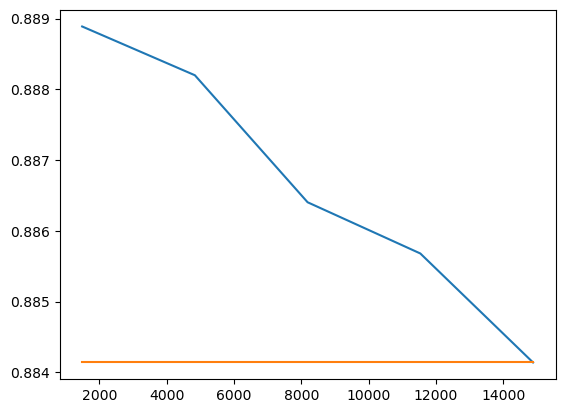

In [62]:
train_sizes, train_scores, test_scores = learning_curve(best_grid, X_.T, y_test, cv=3) 
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score') 
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
plt.show()

param_grid1= {
    'learning_rate': [
        random_search.best_params_['learning_rate'], 
        random_search.best_params_['learning_rate'] + 0.02, 
        random_search.best_params_['learning_rate'] - 0.02
    ],
    'iterations': [
        random_search.best_params_['iterations'], 
        random_search.best_params_['iterations'] + 100, 
        random_search.best_params_['iterations'] - 100
    ],
    'depth': [
        random_search.best_params_['depth'], 
        random_search.best_params_['depth'] + 2, 
        random_search.best_params_['depth'] - 2
    ],
    'bagging_temperature': [
        random_search.best_params_['bagging_temperature'], 
        random_search.best_params_['bagging_temperature'] + 0.02, 
        random_search.best_params_['bagging_temperature'] - 0.02
    ],
    'border_count':[random_search.best_params_['border_count'],
                    random_search.best_params_['border_count']-10
                    ,random_search.best_params_['border_count']+10],
'l2_leaf_reg':[random_search.best_params_['l2_leaf_reg'],
               random_search.best_params_['l2_leaf_reg']+2,
               random_search.best_params_['l2_leaf_reg']+4],
}

grid_search1=GridSearchCV(
    estimator=meta_l, 
    param_grid=param_grid1, 
    cv=2, 
    n_jobs=-1, 
    verbose=1
)

grid_search1.fit(X_.T, y_test)

grid_search1.best_params_

best1=grid_search1.best_estimator_
print(best1)
best_pred1=best1.predict(X_.T)
print("accuracy score",accuracy_score(y_test,best_pred1))
print("accuracy score",confusion_matrix(y_test,best_pred1))
print("accuracy score",classification_report(y_test,best_pred1))

train_sizes, train_scores, test_scores=learning_curve(best1, X_.T, y_test, cv=2) 
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score') 
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')

Hyperopt

In [64]:
def objective(params):
    clf = CatBoostClassifier(
        iterations=int(params['iterations']),
        depth=int(params['depth']),
        learning_rate=params['learning_rate'],
        l2_leaf_reg=int(params['l2_leaf_reg']),
        border_count=int(params['border_count']),
        bagging_temperature=params['bagging_temperature'],
        verbose=0
    )
    score = cross_val_score(clf, X_.T, y_test, cv=2, scoring='accuracy', n_jobs=1).mean()
    return {'loss': -score, 'status': STATUS_OK}


spaces = {
    'iterations': hp.quniform('iterations', 50, 70, 1),
    'depth': hp.quniform('depth', 3, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'l2_leaf_reg': hp.quniform('l2_leaf_reg', 1, 10, 1),
    'border_count': hp.quniform('border_count', 32, 128, 1),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 0.5)
}


trials = Trials()


best = fmin(
    fn=objective,
    space=spaces,
    algo=tpe.suggest,
    trials=trials,
    max_evals=50
)


print("Best Parameters:", best)
 

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002507 seconds
INFO:hyperopt.tpe:TPE using 0 trials


  2%|▉                                               | 1/50 [00:00<00:29,  1.69trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002994 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.884145


  4%|█▉                                              | 2/50 [00:01<00:27,  1.73trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002525 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.884145


  6%|██▉                                             | 3/50 [00:01<00:26,  1.74trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003032 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.884145


  8%|███▊                                            | 4/50 [00:02<00:25,  1.83trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002991 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.884145


 10%|████▊                                           | 5/50 [00:02<00:25,  1.79trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003521 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.884145


 12%|█████▊                                          | 6/50 [00:03<00:25,  1.73trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003576 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.884145


 14%|██████▋                                         | 7/50 [00:04<00:25,  1.70trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003731 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.884145


 16%|███████▋                                        | 8/50 [00:04<00:23,  1.76trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002001 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.884145


 18%|████████▋                                       | 9/50 [00:05<00:23,  1.75trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002988 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.884145


 20%|█████████▍                                     | 10/50 [00:05<00:21,  1.89trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003051 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.884145


 22%|██████████▎                                    | 11/50 [00:06<00:20,  1.88trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002496 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.884145


 24%|███████████▎                                   | 12/50 [00:06<00:20,  1.85trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002997 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.884145


 26%|████████████▏                                  | 13/50 [00:07<00:20,  1.84trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002896 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.884145


 28%|█████████████▏                                 | 14/50 [00:07<00:19,  1.84trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002966 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.884145


 30%|██████████████                                 | 15/50 [00:08<00:19,  1.82trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003508 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.884145


 32%|███████████████                                | 16/50 [00:08<00:19,  1.78trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003016 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.884145


 34%|███████████████▉                               | 17/50 [00:09<00:18,  1.83trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001997 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.884145


 36%|████████████████▉                              | 18/50 [00:09<00:17,  1.82trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003008 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.884145


 38%|█████████████████▊                             | 19/50 [00:10<00:17,  1.78trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002076 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.884145


 40%|██████████████████▊                            | 20/50 [00:11<00:16,  1.87trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002983 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.884145


 42%|███████████████████▋                           | 21/50 [00:11<00:15,  1.85trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003523 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.884145


 44%|████████████████████▋                          | 22/50 [00:12<00:14,  1.91trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002601 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.884145


 46%|█████████████████████▌                         | 23/50 [00:12<00:14,  1.80trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002999 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.884145


 48%|██████████████████████▌                        | 24/50 [00:13<00:14,  1.74trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003025 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.884145


 50%|███████████████████████▌                       | 25/50 [00:13<00:13,  1.82trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003524 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.884145


 52%|████████████████████████▍                      | 26/50 [00:14<00:13,  1.77trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002990 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.884145


 54%|█████████████████████████▍                     | 27/50 [00:14<00:12,  1.77trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002543 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.884145


 56%|██████████████████████████▎                    | 28/50 [00:15<00:11,  1.84trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002532 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.884145


 58%|███████████████████████████▎                   | 29/50 [00:16<00:11,  1.86trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002479 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.884145


 60%|████████████████████████████▏                  | 30/50 [00:16<00:11,  1.78trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002013 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.884145


 62%|█████████████████████████████▏                 | 31/50 [00:17<00:10,  1.82trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003639 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.884145


 64%|██████████████████████████████                 | 32/50 [00:17<00:09,  1.80trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003052 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.884145


 66%|███████████████████████████████                | 33/50 [00:18<00:09,  1.85trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002993 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.884145


 68%|███████████████████████████████▉               | 34/50 [00:18<00:08,  1.80trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003000 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.884145


 70%|████████████████████████████████▉              | 35/50 [00:19<00:08,  1.85trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003027 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.884145


 72%|█████████████████████████████████▊             | 36/50 [00:19<00:07,  1.85trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003560 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.884145


 74%|██████████████████████████████████▊            | 37/50 [00:20<00:07,  1.84trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002559 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.884145


 76%|███████████████████████████████████▋           | 38/50 [00:20<00:06,  1.86trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003108 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.884145


 78%|████████████████████████████████████▋          | 39/50 [00:21<00:05,  1.89trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003522 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss -0.884145


 80%|█████████████████████████████████████▌         | 40/50 [00:21<00:05,  1.91trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003549 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.884145


 82%|██████████████████████████████████████▌        | 41/50 [00:22<00:04,  1.86trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003000 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.884145


 84%|███████████████████████████████████████▍       | 42/50 [00:23<00:04,  1.73trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002747 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.884145


 86%|████████████████████████████████████████▍      | 43/50 [00:23<00:04,  1.70trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003839 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.884145


 88%|█████████████████████████████████████████▎     | 44/50 [00:24<00:03,  1.72trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003009 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.884145


 90%|██████████████████████████████████████████▎    | 45/50 [00:24<00:02,  1.77trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001997 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.884145


 92%|███████████████████████████████████████████▏   | 46/50 [00:25<00:02,  1.82trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003000 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.884145


 94%|████████████████████████████████████████████▏  | 47/50 [00:26<00:01,  1.70trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002541 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss -0.884145


 96%|█████████████████████████████████████████████  | 48/50 [00:26<00:01,  1.73trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003541 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.884145


 98%|██████████████████████████████████████████████ | 49/50 [00:27<00:00,  1.70trial/s, best loss: -0.8841448910520794]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002980 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.884145


100%|███████████████████████████████████████████████| 50/50 [00:27<00:00,  1.79trial/s, best loss: -0.8841448910520794]
Best Parameters: {'bagging_temperature': 0.49625401312199796, 'border_count': 79.0, 'depth': 7.0, 'iterations': 55.0, 'l2_leaf_reg': 4.0, 'learning_rate': 0.2679364278587238}


In [65]:
best_params={
    key:value for key,value in best.items()
}
print(best_params)
f_model=CatBoostClassifier(
iterations=best_params['iterations'],
depth=best_params['depth'],
learning_rate=best_params['learning_rate'],
l2_leaf_reg=best_params['l2_leaf_reg'],
border_count=best_params['border_count'],
bagging_temperature=best_params['bagging_temperature'] 
    
)
f_model.fit(X_.T,y_test)
f_p=f_model.predict(X_.T)
print("accuracy score",accuracy_score(y_test,f_p))
print("accuracy score",confusion_matrix(y_test,f_p))
print("accuracy score",classification_report(y_test,f_p))

{'bagging_temperature': 0.49625401312199796, 'border_count': 79.0, 'depth': 7.0, 'iterations': 55.0, 'l2_leaf_reg': 4.0, 'learning_rate': 0.2679364278587238}
0:	learn: 0.5554349	total: 3.07ms	remaining: 166ms
1:	learn: 0.4777696	total: 5.98ms	remaining: 158ms
2:	learn: 0.4308064	total: 9.31ms	remaining: 161ms
3:	learn: 0.4008679	total: 14.1ms	remaining: 179ms
4:	learn: 0.3829913	total: 18.5ms	remaining: 185ms
5:	learn: 0.3711054	total: 24ms	remaining: 196ms
6:	learn: 0.3637379	total: 28.8ms	remaining: 198ms
7:	learn: 0.3593147	total: 34.8ms	remaining: 204ms
8:	learn: 0.3567537	total: 41.9ms	remaining: 214ms
9:	learn: 0.3553827	total: 48.2ms	remaining: 217ms
10:	learn: 0.3543932	total: 55.2ms	remaining: 221ms
11:	learn: 0.3539167	total: 61ms	remaining: 218ms
12:	learn: 0.3536472	total: 66.8ms	remaining: 216ms
13:	learn: 0.3534562	total: 72.6ms	remaining: 213ms
14:	learn: 0.3533904	total: 77.7ms	remaining: 207ms
15:	learn: 0.3533150	total: 83.4ms	remaining: 203ms
16:	learn: 0.3532716	tot

0:	learn: 0.5679682	total: 589us	remaining: 31.8ms
1:	learn: 0.4961047	total: 1.99ms	remaining: 52.8ms
2:	learn: 0.4509819	total: 2.5ms	remaining: 43.4ms
3:	learn: 0.4238014	total: 3.2ms	remaining: 40.8ms
4:	learn: 0.4062059	total: 3.78ms	remaining: 37.8ms
5:	learn: 0.3950439	total: 4.74ms	remaining: 38.7ms
6:	learn: 0.3881105	total: 5.54ms	remaining: 38ms
7:	learn: 0.3837636	total: 6.44ms	remaining: 37.8ms
8:	learn: 0.3811414	total: 7.33ms	remaining: 37.5ms
9:	learn: 0.3793010	total: 8.08ms	remaining: 36.4ms
10:	learn: 0.3781614	total: 9.13ms	remaining: 36.5ms
11:	learn: 0.3773738	total: 10.3ms	remaining: 37.1ms
12:	learn: 0.3770027	total: 11.6ms	remaining: 37.5ms
13:	learn: 0.3766130	total: 13ms	remaining: 38.1ms
14:	learn: 0.3763399	total: 14.3ms	remaining: 38.1ms
15:	learn: 0.3762445	total: 15.2ms	remaining: 37ms
16:	learn: 0.3761863	total: 16.3ms	remaining: 36.3ms
17:	learn: 0.3760525	total: 17.4ms	remaining: 35.8ms
18:	learn: 0.3759492	total: 18.7ms	remaining: 35.3ms
19:	learn: 0

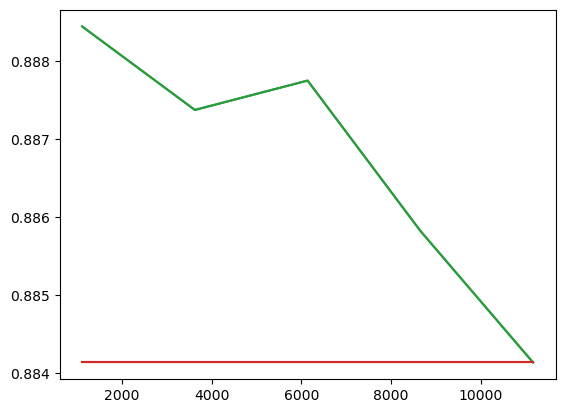

In [67]:
train_sizes, train_scores, test_scores=learning_curve(f_model, X_.T, y_test, cv=2) 
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score') 
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
plt.show()

Optuna

In [68]:
def objective(trial):
     params = {
    'iterations': trial.suggest_int('iterations', 50, 70),
    'depth': trial.suggest_int('depth', 3, 10),
    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
    'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
    'border_count': trial.suggest_int('border_count', 32, 128),
    'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 0.5)
    }
     clf=CatBoostClassifier(
     iterations=params['iterations'],
     depth=params['depth'],
     learning_rate=params['learning_rate'],
     l2_leaf_reg=params['l2_leaf_reg'],
     border_count=params['border_count'],
     bagging_temperature=params['bagging_temperature'],
     verbose=0
    )

   
     score = cross_val_score(clf, X_.T, y_test, cv=3, scoring='accuracy', n_jobs=1).mean()

    
     return -score


study = optuna.create_study(direction='minimize')


study.optimize(objective, n_trials=50)


print("Best Parameters:", study.best_params)
print("Best Score:", -study.best_value)

[I 2024-12-30 14:17:40,268] A new study created in memory with name: no-name-aa020b13-ab2f-4f82-946b-030b21574803
[I 2024-12-30 14:17:41,161] Trial 0 finished with value: -0.8841446981487343 and parameters: {'iterations': 52, 'depth': 8, 'learning_rate': 0.1987975279765168, 'l2_leaf_reg': 3.364028777766634, 'border_count': 118, 'bagging_temperature': 0.09010570380219562}. Best is trial 0 with value: -0.8841446981487343.
[I 2024-12-30 14:17:42,146] Trial 1 finished with value: -0.8841446981487343 and parameters: {'iterations': 70, 'depth': 7, 'learning_rate': 0.06978821446259431, 'l2_leaf_reg': 3.260124118683149, 'border_count': 64, 'bagging_temperature': 0.2608040787911761}. Best is trial 0 with value: -0.8841446981487343.
[I 2024-12-30 14:17:42,941] Trial 2 finished with value: -0.8841446981487343 and parameters: {'iterations': 57, 'depth': 9, 'learning_rate': 0.12632742040083916, 'l2_leaf_reg': 6.425730067659184, 'border_count': 64, 'bagging_temperature': 0.36182350775451455}. Best i

Best Parameters: {'iterations': 52, 'depth': 8, 'learning_rate': 0.1987975279765168, 'l2_leaf_reg': 3.364028777766634, 'border_count': 118, 'bagging_temperature': 0.09010570380219562}
Best Score: 0.8841446981487343


In [69]:
best_param=study.best_params

final_model=CatBoostClassifier(
     iterations=best_param['iterations'],
     depth=best_param['depth'],
     learning_rate=best_param['learning_rate'],
     l2_leaf_reg=best_param['l2_leaf_reg'],
     border_count=best_param['border_count'],
     bagging_temperature=best_param['bagging_temperature'],
     verbose=0
  )
final_model.fit(X_.T,y_test)
final_p=final_model.predict(X_.T)
print("accuracy score",accuracy_score(y_test,final_p))
print("accuracy score",confusion_matrix(y_test,final_p))
print("accuracy score",classification_report(y_test,final_p))

accuracy score 0.8841449755835312
accuracy score [[ 7695  1495]
 [ 1091 12040]]
accuracy score               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



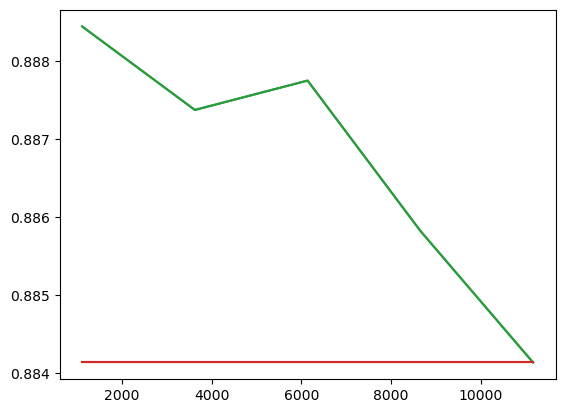

In [71]:
train_sizes, train_scores, test_scores=learning_curve(final_model, X_.T, y_test, cv=2) 
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score') 
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
plt.show()

# Ensemble Learning

AdaBoostClassfier

Try the different combination of the model like we did before for CatBoost.

In [72]:
meta=AdaBoostClassifier()
X_ensemble=np.array([skp,adap,xgbp,cbp,gbp,rp,dp,bp,gp,lrp])
meta.fit(X_ensemble.T,y_test)
meta_p=meta.predict(X_ensemble.T)
print("accuracy score",accuracy_score(y_test,meta_p))
print("accuracy score",confusion_matrix(y_test,meta_p))
print("accuracy score",classification_report(y_test,meta_p))

accuracy score 0.8841449755835312
accuracy score [[ 7695  1495]
 [ 1091 12040]]
accuracy score               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



In [73]:
X_ensembl=np.array([adap,xgbp,cbp,gbp,rp,dp,bp,gp,lrp])
meta.fit(X_ensembl.T,y_test)
meta_p1=meta.predict(X_ensembl.T)
print("accuracy score",accuracy_score(y_test,meta_p1))
print("accuracy score",confusion_matrix(y_test,meta_p1))
print("accuracy score",classification_report(y_test,meta_p1))

accuracy score 0.8841449755835312
accuracy score [[ 7695  1495]
 [ 1091 12040]]
accuracy score               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



In [74]:
X_ensemb=np.array([adap,xgbp,cbp,gbp,rp,bp,gp,lrp])
meta.fit(X_ensemb.T,y_test)
meta_p2=meta.predict(X_ensemb.T)
print("accuracy score",accuracy_score(y_test,meta_p2))
print("accuracy score",confusion_matrix(y_test,meta_p2))
print("accuracy score",classification_report(y_test,meta_p2))

accuracy score 0.8841449755835312
accuracy score [[ 7695  1495]
 [ 1091 12040]]
accuracy score               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



In [75]:
X_ensem=np.array([adap,xgbp,cbp,gbp,rp,gp,lrp])
meta.fit(X_ensem.T,y_test)
meta_p3=meta.predict(X_ensem.T)
print("accuracy score",accuracy_score(y_test,meta_p3))
print("accuracy score",confusion_matrix(y_test,meta_p3))
print("accuracy score",classification_report(y_test,meta_p3))

accuracy score 0.8841449755835312
accuracy score [[ 7695  1495]
 [ 1091 12040]]
accuracy score               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



In [76]:
X_ense=np.array([adap,xgbp,cbp,gbp,rp,lrp])
meta.fit(X_ense.T,y_test)
meta_p4=meta.predict(X_ense.T)
print("accuracy score",accuracy_score(y_test,meta_p4))
print("accuracy score",confusion_matrix(y_test,meta_p4))
print("accuracy score",classification_report(y_test,meta_p4))

accuracy score 0.8841449755835312
accuracy score [[ 7695  1495]
 [ 1091 12040]]
accuracy score               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



In [77]:
X_ens=np.array([adap,xgbp,cbp,gbp,rp])
meta.fit(X_ens.T,y_test)
meta_p5=meta.predict(X_ens.T)
print("accuracy score",accuracy_score(y_test,meta_p5))
print("accuracy score",confusion_matrix(y_test,meta_p5))
print("accuracy score",classification_report(y_test,meta_p5))

accuracy score 0.8841449755835312
accuracy score [[ 7695  1495]
 [ 1091 12040]]
accuracy score               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



In [78]:
X_en=np.array([adap,xgbp,cbp,gbp])
meta.fit(X_en.T,y_test)
meta_p6=meta.predict(X_en.T)
print("accuracy score",accuracy_score(y_test,meta_p6))
print("accuracy score",confusion_matrix(y_test,meta_p6))
print("accuracy score",classification_report(y_test,meta_p6))

accuracy score 0.8841449755835312
accuracy score [[ 7695  1495]
 [ 1091 12040]]
accuracy score               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



In [79]:
X_e=np.array([adap,cbp,gbp])
meta.fit(X_e.T,y_test)
meta_p7=meta.predict(X_e.T)
print("accuracy score",accuracy_score(y_test,meta_p7))
print("accuracy score",confusion_matrix(y_test,meta_p7))
print("accuracy score",classification_report(y_test,meta_p7))

accuracy score 0.8841449755835312
accuracy score [[ 7695  1495]
 [ 1091 12040]]
accuracy score               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



In [80]:
X_=np.array([adap,xgbp,cbp])
meta.fit(X_.T,y_test)
meta_p8=meta.predict(X_.T)
print("accuracy score",accuracy_score(y_test,meta_p8))
print("accuracy score",confusion_matrix(y_test,meta_p8))
print("accuracy score",classification_report(y_test,meta_p8))

accuracy score 0.8841449755835312
accuracy score [[ 7695  1495]
 [ 1091 12040]]
accuracy score               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



# HyperParameter Tuning

For AdaBoostClassifier

Performing the hyperparameter tuning on the highest performed model combination.

RandomSeachCV

In [81]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],  
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  
    'algorithm': ['SAMME', 'SAMME.R'], 
}
random_search = RandomizedSearchCV(
    estimator=meta,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='accuracy',
    cv=10, 
    verbose=1,
    n_jobs=-1,  
    random_state=42
)
random_search.fit(X_.T, y_test)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_model1 = random_search.best_estimator_
y_pred = best_model1.predict(X_.T)
best_random_params = random_search.best_params_
print("Best Parameters from RandomizedSearchCV:", best_random_params)

print("Training Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy score",classification_report(y_test,meta_p8))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Parameters: {'n_estimators': 100, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}
Best Score: 0.8841446404294013
Best Parameters from RandomizedSearchCV: {'n_estimators': 100, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}
Training Accuracy: 0.8841449755835312
Confusion Matrix:
 [[ 7695  1495]
 [ 1091 12040]]
accuracy score               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



In [82]:
train_sizes, train_scores, test_scores=learning_curve(best_model1, X_.T, y_test, cv=2) 
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score') 
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')

GridSearchCV

In [83]:
param_grid = {
    'n_estimators': [best_random_params['n_estimators'] - 10, best_random_params['n_estimators'], best_random_params['n_estimators'] + 10],  
    'learning_rate': np.linspace(best_random_params['learning_rate'] - 0.05, best_random_params['learning_rate'] + 0.05, 5),  
    'algorithm': [best_random_params['algorithm']], 
}


grid_search = GridSearchCV(
    estimator=meta,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_.T, y_test)


print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print("Best Score from GridSearchCV:", grid_search.best_score_)


best_model= grid_search.best_estimator_
y_pred = best_model.predict(X_.T)

print("Training Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best Parameters from GridSearchCV: {'algorithm': 'SAMME.R', 'learning_rate': 0.95, 'n_estimators': 90}
Best Score from GridSearchCV: 0.8841446404294013
Training Accuracy: 0.8841449755835312
Confusion Matrix:
 [[ 7695  1495]
 [ 1091 12040]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



In [84]:
train_sizes, train_scores, test_scores=learning_curve(best_model, X_.T, y_test, cv=2) 
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score') 
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')

In [85]:
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 1),  
    'learning_rate': hp.uniform('learning_rate', 0.01, 1.0),  
    'algorithm': hp.choice('algorithm', ['SAMME', 'SAMME.R'])  
}


def objective(params):
    clf = AdaBoostClassifier(
        n_estimators=int(params['n_estimators']),  
        learning_rate=params['learning_rate'],
        algorithm=params['algorithm']
    )
    
    
    score = cross_val_score(clf, X_.T, y_test, cv=3, scoring='accuracy').mean()
    

    return {'loss': -score, 'status': STATUS_OK}


trials = Trials()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,  
    trials=trials,
    max_evals=50  
)

print("Best Parameters:", best)




  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001008 seconds
INFO:hyperopt.tpe:TPE using 0 trials


  2%|▉                                               | 1/50 [00:02<02:07,  2.61s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001246 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.884145


  4%|█▉                                              | 2/50 [00:04<01:32,  1.93s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001581 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.884145


  6%|██▉                                             | 3/50 [00:09<02:47,  3.57s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002011 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.884145


  8%|███▊                                            | 4/50 [00:11<02:20,  3.06s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002005 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.884145


 10%|████▊                                           | 5/50 [00:13<01:58,  2.63s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001953 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.884145


 12%|█████▊                                          | 6/50 [00:17<02:06,  2.88s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000995 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.884145


 14%|██████▋                                         | 7/50 [00:19<02:01,  2.82s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000976 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.884145


 16%|███████▋                                        | 8/50 [00:23<02:11,  3.14s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002086 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.884145


 18%|████████▋                                       | 9/50 [00:25<01:52,  2.74s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002609 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.884145


 20%|█████████▍                                     | 10/50 [00:29<02:08,  3.22s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002167 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss -0.884145


 22%|██████████▎                                    | 11/50 [00:31<01:43,  2.65s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002039 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss -0.884145


 24%|███████████▎                                   | 12/50 [00:34<01:53,  3.00s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001006 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss -0.884145


 26%|████████████▏                                  | 13/50 [00:36<01:30,  2.45s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002001 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss -0.884145


 28%|█████████████▏                                 | 14/50 [00:38<01:27,  2.43s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001508 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss -0.884145


 30%|██████████████                                 | 15/50 [00:42<01:37,  2.79s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000998 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss -0.884145


 32%|███████████████                                | 16/50 [00:44<01:29,  2.62s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001050 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss -0.884145


 34%|███████████████▉                               | 17/50 [00:47<01:29,  2.71s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001078 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss -0.884145


 36%|████████████████▉                              | 18/50 [00:52<01:48,  3.40s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001014 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss -0.884145


 38%|█████████████████▊                             | 19/50 [00:54<01:36,  3.12s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002476 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss -0.884145


 40%|██████████████████▊                            | 20/50 [00:59<01:49,  3.66s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001094 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss -0.884145


 42%|███████████████████▋                           | 21/50 [01:03<01:46,  3.67s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002014 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss -0.884145


 44%|████████████████████▋                          | 22/50 [01:05<01:32,  3.32s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000935 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss -0.884145


 46%|█████████████████████▌                         | 23/50 [01:10<01:43,  3.83s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001300 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss -0.884145


 48%|██████████████████████▌                        | 24/50 [01:12<01:25,  3.28s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002039 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss -0.884145


 50%|███████████████████████▌                       | 25/50 [01:15<01:20,  3.21s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001011 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss -0.884145


 52%|████████████████████████▍                      | 26/50 [01:20<01:24,  3.53s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss -0.884145


 54%|█████████████████████████▍                     | 27/50 [01:22<01:10,  3.04s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002119 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss -0.884145


 56%|██████████████████████████▎                    | 28/50 [01:24<01:04,  2.93s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001007 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss -0.884145


 58%|███████████████████████████▎                   | 29/50 [01:29<01:12,  3.46s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002042 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss -0.884145


 60%|████████████████████████████▏                  | 30/50 [01:31<01:00,  3.03s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001548 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss -0.884145


 62%|█████████████████████████████▏                 | 31/50 [01:34<00:56,  2.95s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001014 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss -0.884145


 64%|██████████████████████████████                 | 32/50 [01:38<01:00,  3.38s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001001 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss -0.884145


 66%|███████████████████████████████                | 33/50 [01:40<00:49,  2.93s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001495 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss -0.884145


 68%|███████████████████████████████▉               | 34/50 [01:42<00:43,  2.70s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001005 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss -0.884145


 70%|████████████████████████████████▉              | 35/50 [01:45<00:42,  2.80s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000995 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss -0.884145


 72%|█████████████████████████████████▊             | 36/50 [01:50<00:48,  3.49s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002503 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss -0.884145


 74%|██████████████████████████████████▊            | 37/50 [01:51<00:35,  2.75s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001986 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss -0.884145


 76%|███████████████████████████████████▋           | 38/50 [01:53<00:27,  2.29s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001118 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss -0.884145


 78%|████████████████████████████████████▋          | 39/50 [01:55<00:25,  2.35s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001003 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss -0.884145


 80%|█████████████████████████████████████▌         | 40/50 [01:58<00:24,  2.41s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000000 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss -0.884145


 82%|██████████████████████████████████████▌        | 41/50 [02:03<00:28,  3.18s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000981 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss -0.884145


 84%|███████████████████████████████████████▍       | 42/50 [02:05<00:23,  2.94s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001000 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss -0.884145


 86%|████████████████████████████████████████▍      | 43/50 [02:07<00:18,  2.63s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001006 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss -0.884145


 88%|█████████████████████████████████████████▎     | 44/50 [02:08<00:13,  2.21s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001610 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss -0.884145


 90%|██████████████████████████████████████████▎    | 45/50 [02:11<00:12,  2.43s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001994 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss -0.884145


 92%|███████████████████████████████████████████▏   | 46/50 [02:14<00:10,  2.62s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001953 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss -0.884145


 94%|████████████████████████████████████████████▏  | 47/50 [02:19<00:09,  3.21s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001081 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss -0.884145


 96%|█████████████████████████████████████████████  | 48/50 [02:22<00:06,  3.31s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000996 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss -0.884145


 98%|██████████████████████████████████████████████ | 49/50 [02:24<00:02,  2.77s/trial, best loss: -0.8841446981487343]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001999 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss -0.884145


100%|███████████████████████████████████████████████| 50/50 [02:26<00:00,  2.92s/trial, best loss: -0.8841446981487343]
Best Parameters: {'algorithm': 0, 'learning_rate': 0.6462528831202148, 'n_estimators': 136.0}


In [86]:
best_model111= AdaBoostClassifier(
    n_estimators=int(best['n_estimators']),
    learning_rate=best['learning_rate'],
    algorithm=['SAMME', 'SAMME.R'][best['algorithm']] )
best_model111.fit(X_.T, y_test)
y_pred = best_model111.predict(X_.T)
print("Training Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.8841449755835312
Confusion Matrix:
 [[ 7695  1495]
 [ 1091 12040]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



In [87]:
train_sizes, train_scores, test_scores=learning_curve(best_model111, X_.T, y_test, cv=2) 
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score') 
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')

In [88]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0)
    algorithm = trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R'])
    
    
    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        algorithm=algorithm
    )
    
   
    score = cross_val_score(model, X_.T, y_test, cv=3, scoring='accuracy').mean()
    
    return score
study = optuna.create_study(direction='maximize')  
study.optimize(objective, n_trials=50)  


print(f"Best Parameters: {study.best_params}")


best_params = study.best_params

[I 2024-12-30 14:29:27,866] A new study created in memory with name: no-name-0c152af5-dcca-4677-a489-d9891fcac2ff
[I 2024-12-30 14:29:29,999] Trial 0 finished with value: 0.8841446981487343 and parameters: {'n_estimators': 78, 'learning_rate': 0.43765996083529357, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.8841446981487343.
[I 2024-12-30 14:29:34,642] Trial 1 finished with value: 0.8841446981487343 and parameters: {'n_estimators': 168, 'learning_rate': 0.9930350105885918, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.8841446981487343.
[I 2024-12-30 14:29:36,861] Trial 2 finished with value: 0.8841446981487343 and parameters: {'n_estimators': 75, 'learning_rate': 0.7538873901450638, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.8841446981487343.
[I 2024-12-30 14:29:38,876] Trial 3 finished with value: 0.8841446981487343 and parameters: {'n_estimators': 102, 'learning_rate': 0.7994562926248591, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.88414469814

Best Parameters: {'n_estimators': 78, 'learning_rate': 0.43765996083529357, 'algorithm': 'SAMME.R'}


In [89]:
best_model11= AdaBoostClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    algorithm=best_params['algorithm']
)


best_model11.fit(X_.T, y_test)


y_pred = best_model11.predict(X_.T)
print("Training Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.8841449755835312
Confusion Matrix:
 [[ 7695  1495]
 [ 1091 12040]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      9190
           1       0.89      0.92      0.90     13131

    accuracy                           0.88     22321
   macro avg       0.88      0.88      0.88     22321
weighted avg       0.88      0.88      0.88     22321



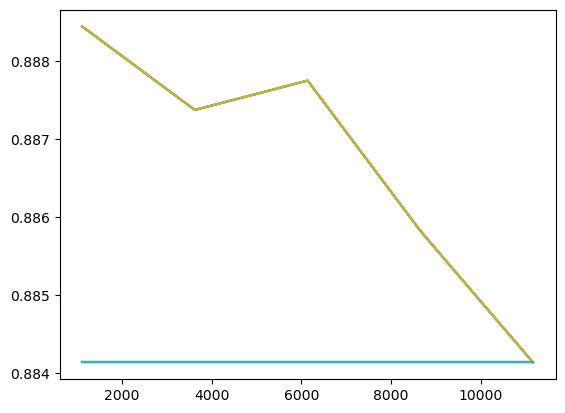

In [91]:
train_sizes, train_scores, test_scores=learning_curve(best_model11, X_.T, y_test, cv=2) 
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score') 
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
plt.show()